In [220]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

In [221]:
# import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [222]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [223]:
train.head() # first 5 lines

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [224]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [225]:
# check empty cells
train.info()
print(' ')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

In [226]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [227]:
# a mean of 0.38 means that 38% of the people survived

In [228]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Reeves, Mr. David",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [229]:
# Everyone has a unique name
# 577 males, 314 Females

In [230]:
# Pivoting Features: To analyze specific group of values by dropping the rest of the features
# Analyzing the survival rate of first-class, second-class, & third-class passengers
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Pclass', ascending=True)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [231]:
# We can observe that 1st class passengers have a higher survival rate

In [232]:
# Survival rate by sex
train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Sex')

,Survived
Sex,
female,0.742038
male,0.188908


In [233]:
# Females had a higher survival rate than males

In [234]:
# Survival rate of people with children
train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by="Survived", ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [235]:
# not much different along the range

In [236]:
# Survival rates of people with siblings or spouse
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


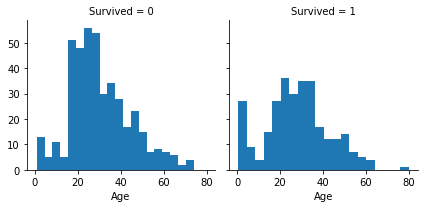

In [237]:
ages = sns.FacetGrid(train, col='Survived')
ages.map(plt.hist, 'Age', bins=20)

Looking at the above graph, we can see that only the 80-year-old passengers fully survived. Meanwhile, babies also showed a high survival rate, whereas people ranging from ages 20 to 40 did not survive as much. 

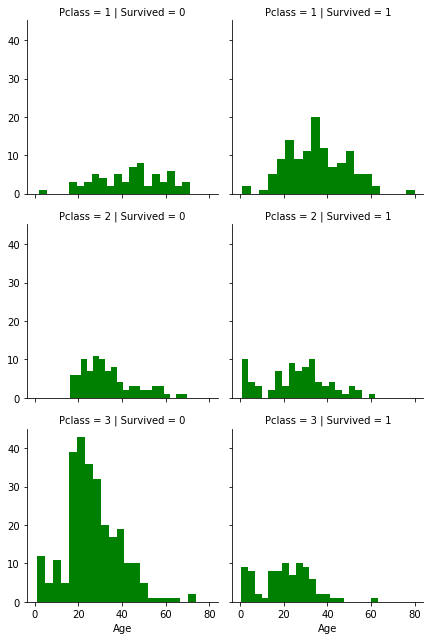

In [238]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', color='green', bins=20)
grid.add_legend()

Most people in the third-class did not survive, while babies in the second class all survived. There does not seem to be an evident association between the passengers' age and the survival rate. 

/Users/Ael/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/Ael/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


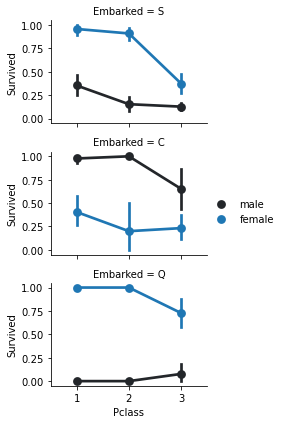

In [239]:
# Comparing gender, embark, and class
grid = sns.FacetGrid(train, row='Embarked', height=2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

Except for the males who embarked from C, males had a lower survival rate. 

/Users/Ael/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


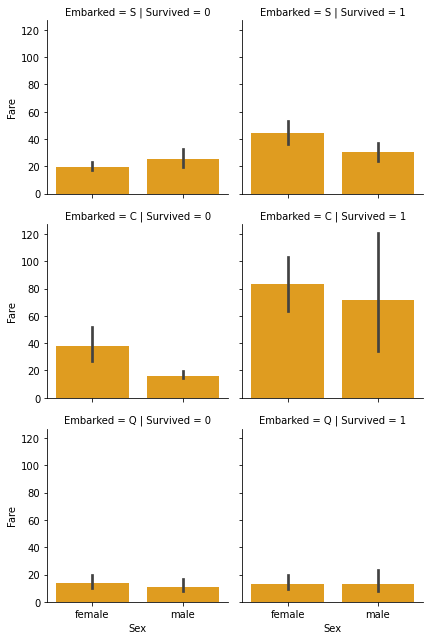

In [240]:
# association between fare price to embarked and gender
grid = sns.FacetGrid(train, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', color='orange')
grid.add_legend()

As shown above passengers with higher fare prices were more likely to survive

In [241]:
# Data Wrangling: drop most features with many missing lines
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
merge = [train, test]

In [242]:
for dataset in merge:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


# Data Cleaning

In [243]:
for dataset in merge:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                                'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Distinct')
    
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    

In [244]:
train[['Title', 'Survived']].groupby(['Title']).mean().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Distinct,0.347826
Mr,0.156673


In [245]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Distinct': 5}

for dataset in merge:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [246]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [247]:
# drop name 
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
merge = [train, test]

# Convert categorical to ordinal

In [248]:
# Convert categorical data into ordinal data
for dataset in merge:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male':0}).astype(int)

In [249]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [250]:
# replace missing embarked feature with mode
freq_port = train.Embarked.dropna().mode()[0]
print(freq_port)

S


The most common 'Embarked' feature was 'S'

In [251]:
# replace missing cells with 'S'
for dataset in merge:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [252]:
# categorical -> ordinal
for dataset in merge:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [253]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


# Estimating Empty Values

In [254]:
# fill in missing values of age 
# modify data into ordinal data
for dataset in merge:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_value = np.random.randint(age_avg-age_std, age_avg+age_std, size=age_null_count)
    
    dataset['Age'][np.isnan(dataset['Age'])] = np.random.choice(age_null_random_value)
    dataset['Age'] = dataset['Age'].astype(int)

In [255]:
train['AgeBand'] = pd.cut(train['Age'], 5)

In [256]:
# categorizing age groups
for dataset in merge:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [257]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,1,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,0,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,0,1,"(32.0, 48.0]"
5,0,3,0,2,0,0,8.4583,2,1,"(32.0, 48.0]"
6,0,1,0,3,0,0,51.8625,0,1,"(48.0, 64.0]"
7,0,3,0,0,3,1,21.0750,0,4,"(-0.08, 16.0]"
8,1,3,1,1,0,2,11.1333,0,3,"(16.0, 32.0]"
9,1,2,1,0,1,0,30.0708,1,3,"(-0.08, 16.0]"


In [258]:
# delete AgeBand, since no longer needed
train = train.drop(['AgeBand'], axis=1)
merge = [train, test]

# Create New Feature With Existing Features

In [259]:
# familySize = Parch + SibSp
for dataset in merge:
    dataset[['FamilySize']] = dataset['SibSp'] + dataset['Parch'] + 1

# avg number of survived individuals in a family 
train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [260]:
for dataset in merge:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train[['IsAlone', 'Survived']].groupby(['IsAlone']).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [261]:
# drop SibSp, Parch, FamilySize
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
merge = [train, test]

In [262]:
for dataset in merge:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,6,2,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


# Continuous Data Conversion Into Ordinal Data for Fare Feature

In [263]:
# drop the missing value, calculate the median, fill in the empty space
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [264]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand']).mean().sort_values(by='FareBand', ascending=True)

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [265]:
for dataset in merge:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31), 'Fare'] = 3
    
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train = train.drop(['FareBand'], axis=1)
merge = [train, test]

# Final Output of Data Cleaning and Data Wrangling

In [266]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,2,1,2,1,1,6
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [267]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# Data and Label

In [268]:
X_train = train.drop("Survived", axis=1) # training data
Y_train = train["Survived"] # training label
X_test = test.drop("PassengerId", axis=1) # test data

# Prediction Using Regression Models

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

## Logistic Regression

In [270]:
X_train = train.drop("Survived", axis=1) # training data
Y_train = train["Survived"] # training label
X_test = test.drop("PassengerId", axis=1) # test data

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.92

## Naive Bayes Classifier

In [271]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.42

## Support Vector Machine (SVM)

In [272]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.38

## K-Nearest Neighbour (KNN)

In [273]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.61

## Random Forest

In [274]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.32

In [275]:
models = pd.DataFrame({'Model': ['SVC', 'LogReg', 'KNN', 'Naive Bayes', 'Random Forest'], 
                      'Score': [acc_svc, acc_log, acc_knn, acc_gaussian, acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,87.32
2,KNN,83.61
0,SVC,82.38
1,LogReg,80.92
3,Naive Bayes,75.42


In [276]:
pd.set_option('display.max_rows', 500)
output = pd.DataFrame({
    "PassengerId": test["PassengerId"], 
    "Survived": Y_pred
})
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         1
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         1
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         0
30           922         0
31           923         0
32           924         1
33           925         0
34           926         1
35           927         0
3